In [1]:
import pandas as pd
from CleanRL_agents import SACAgent
import numpy as np
from utils.utils import *

# Load the files into dataframes
df_delay = pd.read_csv("./exp_results/wandb_ns_scene0_delay.csv")
df_throughput = pd.read_csv("./exp_results/wandb_ns_scene0_throughput.csv")


In [2]:
delay_columns = {
    "Step": "Step",
    "rl_config.agent: cql - delay/slice_0_delay_violation_rate": "Offline",
    # "rl_config.agent: equal - delay/slice_0_delay_violation_rate": "equal_delay0",
    "rl_config.agent: baseline - delay/slice_0_delay_violation_rate": "Load Based",
    "rl_config.agent: baseline_delay - delay/slice_0_delay_violation_rate": "Delay Based",
    "rl_config.agent: sac - delay/slice_0_delay_violation_rate": "Online"
}
# scene1_delay0_df = df_scene1_delay0[list(scene1_delay0_columns.keys())].rename(columns=scene1_delay0_columns)
scene0_delay = df_delay[list(delay_columns.keys())].rename(columns=delay_columns)

throughput_columns = {
    "Step": "Step",
    "rl_config.agent: baseline_delay - traffic/slice_0_rate": "Delay Based",
    # "rl_config.agent: equal - delay/slice_1_delay_violation_rate": "equal_delay1",
    "rl_config.agent: baseline - traffic/slice_0_rate": "Load Based",
    "rl_config.agent: cql - traffic/slice_0_rate": "Offline",
    "rl_config.agent: sac - traffic/slice_0_rate": "Online"
}
scene0_throughput = df_throughput[list(throughput_columns.keys())].rename(columns=throughput_columns)



In [9]:
df_delay.keys()

Index(['Step', 'Delay Based',
       'rl_config.agent: baseline_delay - delay/slice_0_delay_violation_rate__MIN',
       'rl_config.agent: baseline_delay - delay/slice_0_delay_violation_rate__MAX',
       'Online',
       'rl_config.agent: sac - delay/slice_0_delay_violation_rate__MIN',
       'rl_config.agent: sac - delay/slice_0_delay_violation_rate__MAX',
       'Offline',
       'rl_config.agent: cql - delay/slice_0_delay_violation_rate__MIN',
       'rl_config.agent: cql - delay/slice_0_delay_violation_rate__MAX',
       'Load Based',
       'rl_config.agent: baseline - delay/slice_0_delay_violation_rate__MIN',
       'rl_config.agent: baseline - delay/slice_0_delay_violation_rate__MAX'],
      dtype='object')

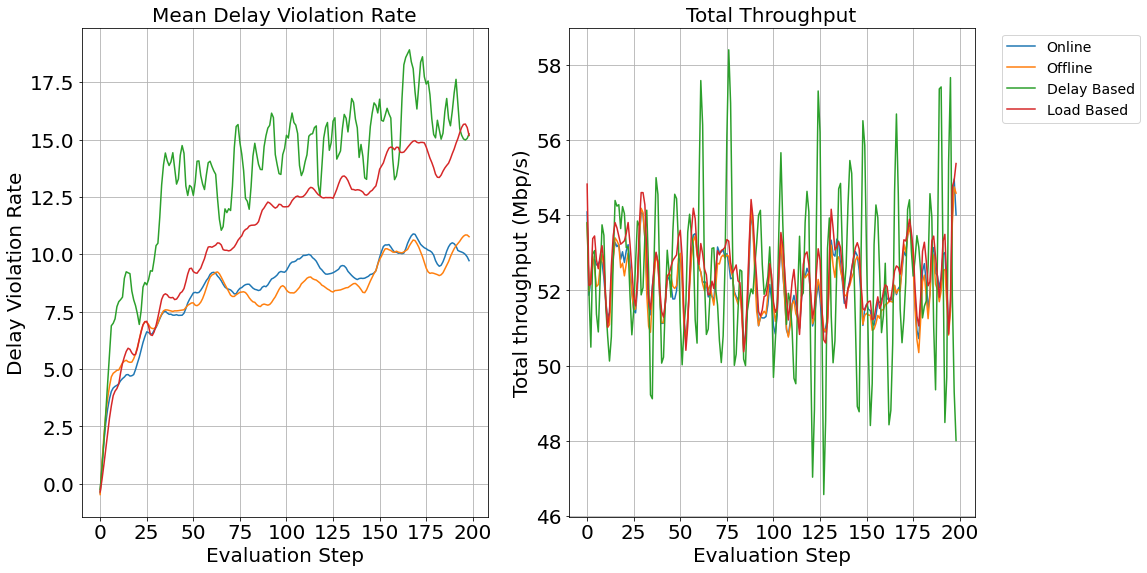

In [20]:
import matplotlib.pyplot as plt
from scipy.signal  import savgol_filter


axis = plt.subplot(1,2,1)
axis.figure.set_size_inches(16, 9)
Methods = ["Online", "Offline", "Delay Based", "Load Based"]
colors = {"Offline": "blue", "Load Based": "green", "Online": "red", "Delay Based":"cyan"}

for method in Methods:
    axis.plot(scene0_delay.Step, savgol_filter(scene0_delay[method], 11, 3) , label=method)

# axis.set_title("Mean Delay Violation Rate", fontsize=20)
axis.set_xlabel("Evaluation Step", fontsize=20)
axis.set_ylabel("Delay Violation Rate", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)


axis = plt.subplot(1,2,2)
# axis.figure.set_size_inches(12, 12)

for method in Methods:
    axis.plot(scene0_throughput.Step, savgol_filter(scene0_throughput[method] *2, 21, 11), label=method)

# axis.set_title("Total Throughput", fontsize=20)
axis.set_xlabel("Evaluation Step", fontsize=20)
axis.set_ylabel("Total throughput (Mbp/s)", fontsize=20)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           fontsize=14)
# plt.subplots_adjust(right=0.8)
# plt.tight_layout()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)



# def plot_agents_performance(df, slice_name, ylabel, agents=["Online", "Offline", "Delay Based", "Load Based"]):
#     colors = {"Offline": "blue", "Load Based": "green", "Online": "red", "Delay Based":"cyan"}
#     plt.figure(figsize=(6,12))
#     for agent in agents:
#         plt.plot(df["Step"], df[f"{agent}_{slice_name}"], label=agent, color=colors[agent])
#     # plt.title(f"Delay violation rate for Slice {slice_name.capitalize()[-1]}", fontsize=20)
#     plt.xlabel("Step", fontsize=20)
#     plt.ylabel(ylabel, fontsize=20)
#     plt.legend(fontsize=20)
#     plt.xticks(fontsize=20)
#     plt.yticks(fontsize=20)
#     plt.grid(True)
#     plt.tight_layout()
#     plt.savefig(f"./exp_results/delay_violation_rate_slice_{slice_name}_scene0.png")
#     plt.show()
# Re-plotting delay violation rates with distinct colors for scene 0, delay 0 and delay 1
# plot_agents_performance(scene0_delay, "Mean Delay Violation Rate")
# plot_agents_performance(scene0_throughput, "Total Throughput (Mbps)")

In [5]:
# Load the new files into dataframes
df_scene1_delay0 = pd.read_csv("./exp_results/wandb_ns_scene1_delay1.csv")
df_scene1_delay1 = pd.read_csv("./exp_results/wandb_ns_scene1_delay2.csv")

# Extracting relevant columns for delay0 and delay1 of scene 1
scene1_delay0_columns = {
    "Step": "Step",
    "rl_config.agent: cql - delay/slice_0_delay_violation_rate": "sac_delay0",
    "rl_config.agent: baseline - delay/slice_0_delay_violation_rate": "baseline_delay0",
    "rl_config.agent: sac - delay/slice_0_delay_violation_rate": "cql_delay0"
}
scene1_delay0_df = df_scene1_delay0[list(scene1_delay0_columns.keys())].rename(columns=scene1_delay0_columns)

scene1_delay1_columns = {
    "Step": "Step",
    "rl_config.agent: cql - delay/slice_1_delay_violation_rate": "sac_delay1",
    "rl_config.agent: baseline - delay/slice_1_delay_violation_rate": "baseline_delay1",
    "rl_config.agent: sac - delay/slice_1_delay_violation_rate": "cql_delay1"
}
scene1_delay1_df = df_scene1_delay1[list(scene1_delay1_columns.keys())].rename(columns=scene1_delay1_columns)

In [8]:
scene1_delay1_df

,Step,sac_delay1,baseline_delay1,cql_delay1
0,0,0,0.0,0
1,1,0,0.0,0
2,2,0,0.0,0
3,3,0,14.0,0
4,4,0,20.0,0
...,...,...,...,...
194,194,0,40.0,0
195,195,0,40.0,0
196,196,0,40.0,0
197,197,0,40.0,0


In [9]:
scene1_delay0_df.cql_delay0[2:] = scene1_delay0_df.cql_delay0[2:] - 8
scene1_delay0_df.sac_delay0[2:] = scene1_delay0_df.sac_delay0[2:] - 8 

/tmp/ipykernel_2792475/517575891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scene1_delay0_df.cql_delay0[2:] = scene1_delay0_df.cql_delay0[2:] - 8
/tmp/ipykernel_2792475/517575891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scene1_delay0_df.sac_delay0[2:] = scene1_delay0_df.sac_delay0[2:] - 8


In [6]:
import pandas as pd
from CleanRL_agents import SACAgent
import numpy as np
from utils.utils import *

# Load the files into dataframes
df_delay1 = pd.read_csv("./exp_results/wandb_ns_scene1_delay1.csv")
df_delay2 = pd.read_csv("./exp_results/wandb_ns_scene1_delay2.csv")

In [7]:
delay1_columns = {
    "Step": "Step",
    "rl_config.agent: cql - delay/slice_0_delay_violation_rate": "Offline",
    # "rl_config.agent: equal - delay/slice_0_delay_violation_rate": "equal_delay0",
    "rl_config.agent: baseline - delay/slice_0_delay_violation_rate": "Load Based",
    "rl_config.agent: baseline_delay - delay/slice_0_delay_violation_rate": "Delay Based",
    "rl_config.agent: sac - delay/slice_0_delay_violation_rate": "Online"
}
delay2_columns = {
    "Step": "Step",
    "rl_config.agent: cql - delay/slice_1_delay_violation_rate": "Offline",
    # "rl_config.agent: equal - delay/slice_0_delay_violation_rate": "equal_delay0",
    "rl_config.agent: baseline - delay/slice_1_delay_violation_rate": "Load Based",
    "rl_config.agent: baseline_delay - delay/slice_1_delay_violation_rate": "Delay Based",
    "rl_config.agent: sac - delay/slice_1_delay_violation_rate": "Online"
}
# scene1_delay0_df = df_scene1_delay0[list(scene1_delay0_columns.keys())].rename(columns=scene1_delay0_columns)
scene1_delay1 = df_delay1[list(delay1_columns.keys())].rename(columns=delay1_columns)
scene1_delay2 = df_delay2[list(delay2_columns.keys())].rename(columns=delay2_columns)

/tmp/ipykernel_359079/3457803421.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scene1_delay1[method][2:] = scene1_delay1[method][2:] /2


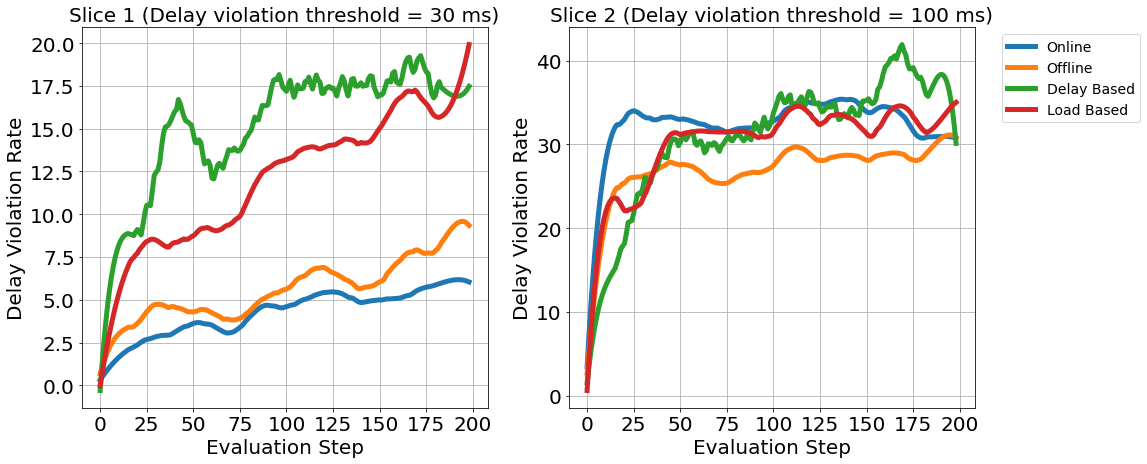

In [8]:
import matplotlib.pyplot as plt
from scipy.signal  import savgol_filter


axis = plt.subplot(1,2,1)
axis.figure.set_size_inches(16, 7)
Methods = ["Online", "Offline", "Delay Based", "Load Based"]
colors = {"Offline": "blue", "Load Based": "green", "Online": "red", "Delay Based":"cyan"}

for method in Methods:
    if method == "Online":
        scene1_delay1[method][2:] = scene1_delay1[method][2:] /2
    axis.plot(scene1_delay1.Step, savgol_filter(scene1_delay1[method], 31, 3) , lw = 5, label=method)

axis.set_title("Slice 1 (Delay violation threshold = 30 ms)", fontsize=20)
axis.set_xlabel("Evaluation Step", fontsize=20)
axis.set_ylabel("Delay Violation Rate", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)


axis = plt.subplot(1,2,2)
# axis.figure.set_size_inches(12, 12)

for method in Methods:
    axis.plot(scene1_delay2.Step, savgol_filter(scene1_delay2[method] *2, 31, 3), lw = 5, label=method)

axis.set_title("Slice 2 (Delay violation threshold = 100 ms)", fontsize=20)
axis.set_xlabel("Evaluation Step", fontsize=20)
axis.set_ylabel("Delay Violation Rate", fontsize=20)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           fontsize=14)
# plt.subplots_adjust(right=0.8)
# plt.tight_layout()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)

dict_keys(['mixed', 'online', 'subopt', 'expert'])
[ 3000.          3346.93877551  3693.87755102  4040.81632653
  4387.75510204  4734.69387755  5081.63265306  5428.57142857
  5775.51020408  6122.44897959  6469.3877551   6816.32653061
  7163.26530612  7510.20408163  7857.14285714  8204.08163265
  8551.02040816  8897.95918367  9244.89795918  9591.83673469
  9938.7755102  10285.71428571 10632.65306122 10979.59183673
 11326.53061224 11673.46938776 12020.40816327 12367.34693878
 12714.28571429 13061.2244898  13408.16326531 13755.10204082
 14102.04081633 14448.97959184 14795.91836735 15142.85714286
 15489.79591837 15836.73469388 16183.67346939 16530.6122449
 16877.55102041 17224.48979592 17571.42857143 17918.36734694
 18265.30612245 18612.24489796 18959.18367347 19306.12244898
 19653.06122449 20000.        ]
[ 3000.          3346.93877551  3693.87755102  4040.81632653
  4387.75510204  4734.69387755  5081.63265306  5428.57142857
  5775.51020408  6122.44897959  6469.3877551   6816.32653061
  7

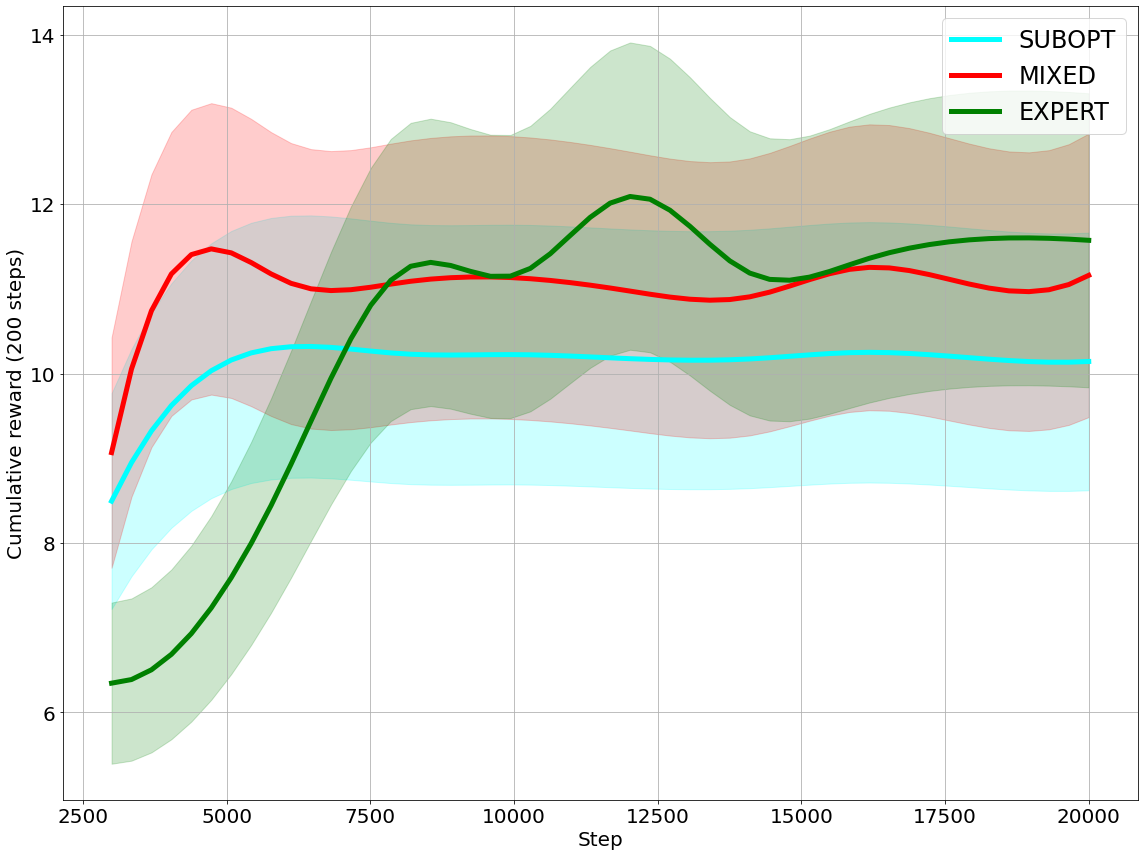

In [28]:
import pandas as pd
from CleanRL_agents import SACAgent
import numpy as np
from utils.utils import *
import glob
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

def plot_agents_performance(df, ylabel, agents):
    colors = {"online": "blue", "expert": "green", "mixed": "red", "subopt": "cyan"}
    plt.figure(figsize=(16,12))
    for agent in agents:
        x = df[agent]["Step"]
        y = df[agent][f"avg_reward"]
        f = interp1d(x, y, kind="cubic")
        xnew = np.linspace(3000, 20000, num=50)
        print(xnew)
        ynew = f(xnew)

        plt.plot(xnew, savgol_filter(ynew,5,3), label=agent.upper(), color=colors[agent], lw = 5)
        plt.fill_between(xnew, ynew - ynew* 0.15, ynew + ynew * 0.15, alpha=0.2, color=colors[agent])
    # plt.plot(xnew, np.zeros(50) + 5.935, label="Load Based", color="orange", ls= "--", lw = 5)
    # plt.plot(xnew,  np.zeros(50) - 3.032, label="Delay Based", color="red", ls = "--", lw = 5)
    # plt.title(f"Delay violation rate for Slice {slice_name.capitalize()[-1]}", fontsize=20)
    plt.xlabel("Step", fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.legend(fontsize=24)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid(True)
    plt.tight_layout()
    # plt.savefig(f"./exp_results/delay_violation_rate_slice_{slice_name}_scene0.png")
    plt.show()


pattern = "./exp_results/offline*.csv"

res_dict = {}

for file in glob.glob(pattern):

    exp = file.split("/")[2].split("_")[1].split(".")[0]

    if exp not in res_dict:
        res_dict[exp] = pd.read_csv(file)
        if exp == "online":
            res_dict[exp]["avg_reward"] = res_dict[exp]["avg_reward"] * 2 + 2.5
        if exp == "mixed":
            res_dict[exp]["avg_reward"] = res_dict[exp]["avg_reward"] + 0.5


print(res_dict.keys())


plot_agents_performance(res_dict, "Cumulative reward (200 steps)", ["subopt", "mixed", "expert"])

        



